<a href="https://colab.research.google.com/github/Kowsher/credit-scoring-model/blob/master/bankrup_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [0]:

dataset = pd.read_csv("Bankruptcy database.csv")

In [31]:
dataset.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,1.17,0.40,0.10,0.14,0.13,0.03,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,1.73,0.60,0.78,0.63,0.05,0.06,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,1.36,0.41,0.66,0.70,-0.01,-0.02,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,1.13,0.44,0.58,0.57,-0.02,-0.02,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,1.88,0.42,0.62,0.46,0.01,0.02,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [32]:



for i in range (len(dataset["Bankrupt"])):
  if dataset["Bankrupt"][i] == 2:
     dataset["Bankrupt"][i] = 0




KeyError: ignored

In [0]:
dataset.head()

,Bankrupt,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2
0,0,-1.290473,0.479717,-0.004910,0.024015,0.077173,-0.448625,0.213450,-2.575387,0.032042,2.408469,0.490784,0.702352,0.291615,0.218312,0.209900,-0.935195,-0.504989,1.851898,-0.779133,0.124895,-0.133551,0.025336,-0.199254,0.010519,0.090406,-0.115375,0.433477,0.748615,1.727003,0.156131,-0.002039,-0.625235,-0.107593,-0.082730,0.246000,-0.323495,0.000000,0.294089,0.310826,-165792,-5652
1,0,0.805563,-3.500162,0.084963,2.569929,0.085678,0.078022,0.112734,-132.924424,0.028916,2.962996,0.198550,0.104708,0.035339,0.003499,0.073122,-0.022291,-0.021805,1.022291,-0.051487,0.095598,-4.288680,0.044300,0.044300,0.014951,0.945978,0.047804,0.992237,0.919499,0.926693,0.876630,0.028675,1.034181,0.043334,0.014951,0.014468,-0.017377,0.233469,0.285401,0.310327,1,-8489
2,1,7.371800,1.269988,0.452845,1.081761,0.435794,0.442539,0.484139,6.187740,0.202114,2.156176,0.597083,0.415873,0.192875,0.001457,0.266830,0.348460,0.534825,0.651539,-0.176039,0.041025,0.117732,0.532103,0.532103,0.246780,1.373357,0.871564,1.583213,0.966574,0.610514,0.838454,0.210022,0.125965,0.816685,0.246780,0.059420,-0.081644,0.099198,0.059799,0.448281,-45120,-129543
3,1,0.211235,0.247720,0.209800,0.234715,0.117347,0.115143,0.395295,2.722647,0.092727,1.265515,0.597359,0.129158,0.102059,0.007137,0.214812,0.464812,0.868501,0.535187,0.076827,0.118688,0.255346,0.164733,0.164733,0.130170,1.270944,0.395517,1.579970,0.658057,0.416499,0.529347,0.165782,0.682571,0.307803,0.130170,0.101705,0.060708,0.162649,0.253515,0.519991,0,6574
4,0,-1.312933,3.309991,-0.077318,-0.506204,-0.235142,-0.246848,0.294655,-44.188591,-0.071354,3.295435,0.106326,0.264906,0.080386,0.003552,0.305711,-0.074577,-0.070396,1.059390,-0.023167,0.000382,-0.005127,0.007378,-0.102762,0.002239,0.696977,-0.097037,0.881080,0.933070,1.059007,0.738103,-0.023462,-0.440893,-0.097002,-0.031183,0.059163,-0.007030,0.191066,0.055808,0.283140,0,900


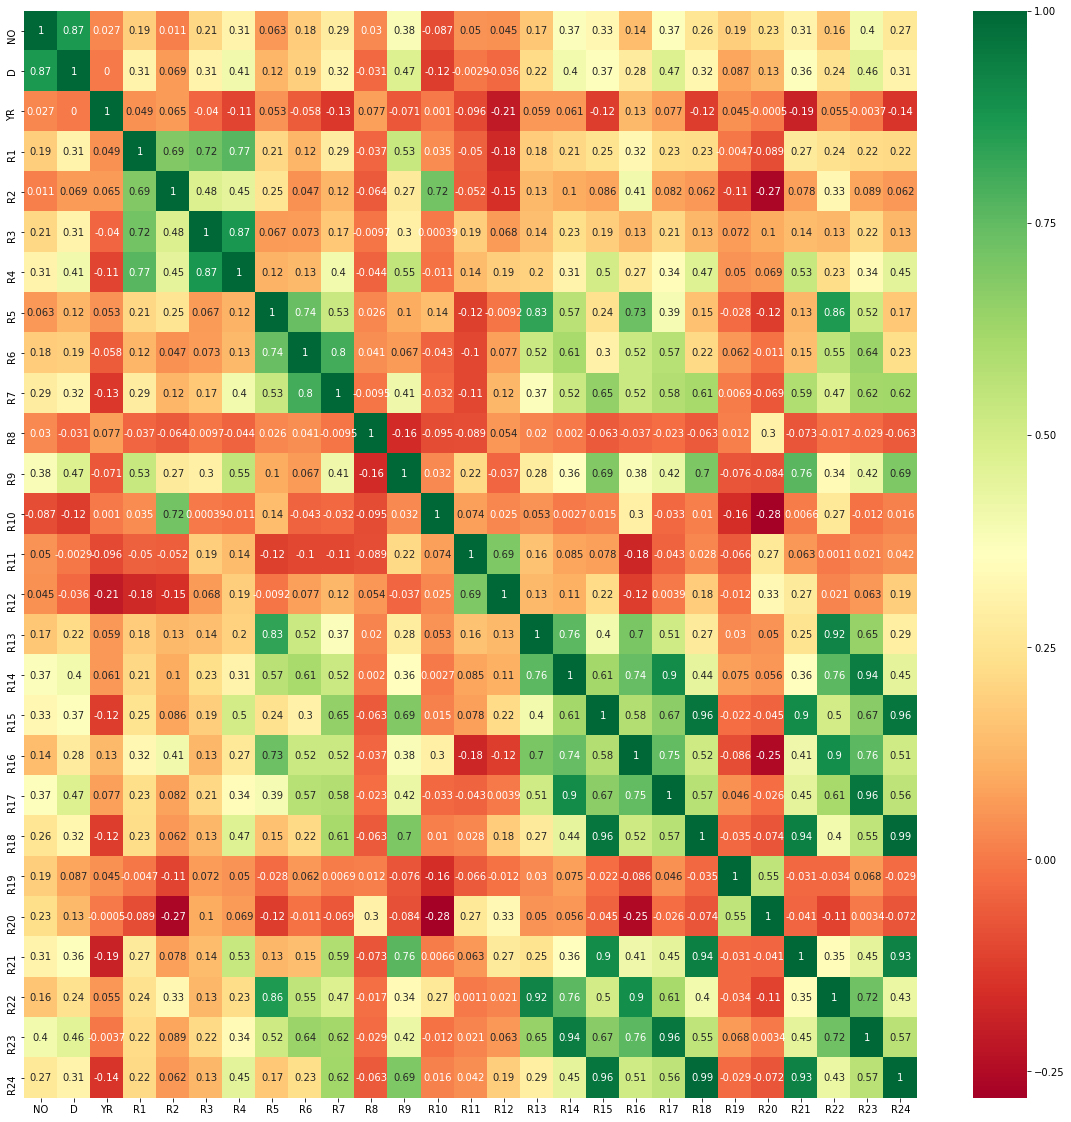

In [33]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:

X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values   #target column i.e price range


In [7]:
X

array([[-1.29047294e+00,  4.79717153e-01, -4.90971800e-03, ...,
         3.10826208e-01, -1.65792000e+05, -5.65200000e+03],
       [ 8.05562563e-01, -3.50016218e+00,  8.49625470e-02, ...,
         3.10327326e-01,  1.00000000e+00, -8.48900000e+03],
       [ 7.37179961e+00,  1.26998769e+00,  4.52844634e-01, ...,
         4.48281430e-01, -4.51200000e+04, -1.29543000e+05],
       ...,
       [-1.17565403e+00,  6.54869397e-01, -2.20790652e-01, ...,
         1.65545528e-01,  0.00000000e+00, -6.49000000e+02],
       [-5.28392638e-01,  3.25816448e-01, -1.19854839e-01, ...,
         4.86668530e-01, -1.54154000e+05, -6.21230000e+04],
       [-1.07703279e+01,  1.07145157e+00, -7.56495270e-02, ...,
         3.38309562e-01,  0.00000000e+00,  7.34550000e+04]])

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
test = SelectKBest(score_func=f_classif, k=12)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
X = fit.transform(X)

[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [35]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
y=y.astype('int')

In [37]:
c1 = 0
c0 = 0

for i in y:
  if i == 0:
    c0 = c0 + 1
  else:
    c1 = c1 + 1
print(c0, c1)

66 66


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Fitting Random Fresto Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print(cm)
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

[[11  3]
 [ 2 11]]
cm =  0.8148148148148148
f1 =  0.8148148148148148


In [0]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.7407407407407407
f1 =  0.7393103448275862


In [45]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.8518518518518519
f1 =  0.8516483516483516


In [46]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.7777777777777778
f1 =  0.7774725274725274


In [47]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.7777777777777778
f1 =  0.7774725274725274


In [48]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.7407407407407407
f1 =  0.7407407407407408


In [49]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)
print(cm)

cm =  0.7777777777777778
f1 =  0.7774725274725275
[[11  3]
 [ 3 10]]


In [51]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 25))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu'))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=25, units=6, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.4762
Epoch 2/100
105/105 [==============================] - 0s 172us/step - loss: 0.6931 - acc: 0.5048
Epoch 3/100
105/105 [==============================] - 0s 174us/step - loss: 0.6931 - acc: 0.5048
Epoch 4/100
105/105 [==============================] - 0s 201us/step - loss: 0.6931 - acc: 0.5048
Epoch 5/100
105/105 [==============================] - 0s 169us/step - loss: 0.6930 - acc: 0.5048
Epoch 6/100
105/105 [==============================] - 0s 178us/step - loss: 0.6926 - acc: 0.5048
Epoch 7/100
105/105 [==============================] - 0s 191us/step - loss: 0.6916 - acc: 0.5048
Epoch 8/100
105/105 [==============================] - 0s 203us/step - loss: 0.6894 - acc: 0.5143
Epoch 9/100
105/105 [==============================] - 0s 182us/step - loss: 0.6853 - acc: 0.6952
Epoch 10/100
105/105 [==============================] - 0s 148us/step - loss: 0.6783 - acc: 0.8286
Epoch 11/100
105/105 

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)
print(cm)

cm =  0.8148148148148148
f1 =  0.8148148148148148
[[11  3]
 [ 2 11]]


In [0]:
y1 = X_train[:, 1]
y2 = X_train[:, 3]
y3 = X_train[:, 4]
y4 = X_train[:, 6]
y5 = X_train[:, 7]
y6 = X_train[:, 9]
y7 = X_train[:, 12]
y8 = X_train[:, 13]
y9 = X_train[:, 14]
y10 = X_train[:, 15]
y11= X_train[:, 16]
y12= X_train[:, 17]
y13= X_train[:, 18]

y14 = X_train[:, 21]
y15= X_train[:, 22]
y16= X_train[:, 23]
y17= X_train[:, 24]




yt1 = X_test[:, 1]
yt2 = X_test[:, 3]
yt3 = X_test[:, 4]
yt4 = X_test[:, 6]
yt5 = X_test[:, 7]
yt6 = X_test[:, 9]
yt7 = X_test[:, 12]
yt8 = X_test[:, 13]
yt9 = X_test[:, 14]
yt10 = X_test[:, 15]
yt11= X_test[:, 16]
yt12= X_test[:, 17]
yt13= X_test[:, 18]

yt14 = X_test[:, 21]
yt15= X_test[:, 22]
yt16= X_test[:, 23]
yt17= X_test[:, 24]


In [0]:



from scipy.optimize import curve_fit

def test_func1(X, a, b, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17):
    y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17 = X

    return ((1/(b))*(a-c1*y1-c2*y2-c3*y3-c4*y4-c5*y5-c6*y6-c7*y7-c8*y8-c9*y9-c10*y10-c11*y11-c12*y12-c13*y13 - c14*y14-c15*y15-c16*y16-c17*y17)) 
p0 = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]        # initial guesses
c,cov = curve_fit(test_func1, (y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17), y_train, p0)  # fit model


yxt = test_func1((yt1, yt2, yt3, yt4, yt5, yt6, yt7, yt8, yt9, yt10, yt11, yt12, yt13, yt14, yt15, yt16, yt17),c[0],c[1],c[2],c[3],c[4],c[5],c[6], c[7],c[8],c[9], c[10],c[11],c[12],c[13],c[14], c[15],c[16], c[17],c[18])
yx  = test_func1((y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17),c[0],c[1],c[2],c[3],c[4],c[5],c[6], c[7],c[8],c[9], c[10],c[11],c[12],c[13],c[14], c[15],c[16], c[17],c[18])



In [61]:

t_data = []
for i in range(len(yxt)):
  if yxt[i]>0.7:
    t_data.append(1)
  else:
    t_data.append(0)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, t_data)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, t_data, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print(cm)
print("f1 = ", f1)

cm =  0.7777777777777778
[[12  2]
 [ 4  9]]
f1 =  0.775
